# stacked LSTMs

LSTMs look for sequential data, in 3 dimensions: __samples__, __time steps__, & __features__, in that order.

however, with keras ```LSTM()``` default parameters, LSTMs output only a single value (after their multiple time steps).

to remedy this, we can set the ```return_sequences``` parameter to ```True```, and our LSTMs will output one value per time step--a 3D array __sequence__ we can feed into the next LSTM layer.

In [2]:
# imports

from keras.models import Sequential
from keras.layers import LSTM
from numpy import array

Using TensorFlow backend.


#### two-dimensional, single-value output

here's an example of an LSTM output of a single value, in the form of a 2D array:

In [25]:
# initialize model

default_lstm = Sequential()

# design model

default_lstm.add(LSTM(1, input_shape=(5, 1)))

# compile model

default_lstm.compile(optimizer='adam', loss='mse')


the ```default_lstm``` model above takes as input:

* 1 memory cell
* 5 time steps
* 1 feature

to calculate loss and minimize the error, ```default_lstm``` uses:

* __ mean squared erorr__ ('mse') *loss function*
* __adam__ gradient descent as its *optimizer*

let's generate some data:

In [28]:
# create data then reshape() into 3d array

data = array([0.1, 0.2, 0.3, 0.4, 0.5]).reshape((1, 5, 1))

get predictions:

In [29]:
preds = default_lstm.predict(data)

print(preds)

[[-0.13126174]]


this run of our ```default_lstm``` model produced the value -0.13126174, outputting it as a 2d array:

```[[-0.13126174]]```

*note: LSTMs are stochastic, so if i run this again, it may produce a different result...but that result will still be a single value in a 2d array.*

we need a __sequence__ of values, returned as a 3d array so that it can be fed into a hypothetical next LSTM layer.

now we'll set ```output_sequences=True``` to get one output for each time step, as an array that's ready for another LSTM layer:

In [30]:
seq_model = Sequential()

seq_model.add(LSTM(1, return_sequences=True, input_shape=(5, 1)))

seq_model.compile(optimizer='adam', loss='mse')

print(seq_model.predict(data))

[[[ 0.00361657]
  [ 0.00901196]
  [ 0.01538688]
  [ 0.02239283]
  [ 0.02988665]]]


sweet! our ```seq_model``` outputs a 3d array of values, one for each time step, i.e. one per each input value.

### damped sine wave problem

*(sine wave generation & plotting code from jason brownlee's excellent course on LSTMs at machinelearningmastery.com)*

a [damped sine wave](https://en.wikipedia.org/wiki/Damped_sine_wave "damped sine wave") is a sine wave whose amplitude is gradually decreasing (approaching zero).

we'd like to see whether an LSTM trained on an earlier part of the wave can predict the dampening.

after all, a sine wave is really just another sequence of values, right?

In [32]:
from math import sin
from math import pi
from matplotlib import pyplot
%matplotlib inline

here's what a regular sine wave looks like:

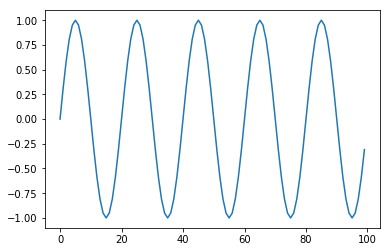

In [38]:
# create sine wave sequence

length = 100
freq = 5
seq = [sin(2 * pi * freq * (i/float(length))) for i in range(length)]

# plot sequence

pyplot.plot(seq)

here's a sine wave whose amplitude is gradually approaching zero--a __damped__ sine wave:

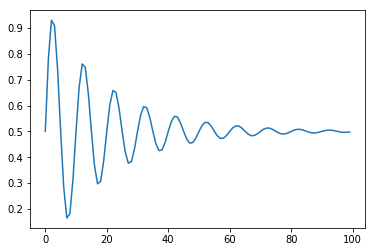

In [43]:
from math import exp

damped_length = 100
period = 10
decay = 0.05

# create sequence

damped_seq = [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) 
              for i in range(length)]

# plot sequence

pyplot.plot(damped_seq)